In [41]:
import pandas as pd

In [42]:
df=pd.read_csv("C:/Users/pc/Desktop/민지/동아리/프로젝트/리뷰정보.csv")
df.drop(["Unnamed: 0.1","Unnamed: 0"], axis=1, inplace=True)
print(df.shape)
df.head(5)

(16743, 9)


,제품명,ID,피부타입,별점,날짜,상세 평점(1),상세 평점(2),상세 평점(3),리뷰 내용
0,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,yoni****,NaN,5점만점에 5점,2023.12.17,건성에 좋아요,아주 만족해요,자극없이 순해요,아이리무버는 이것만 써요\n눈에 자극 없이 순해서 좋아요!!
1,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,yoni****,NaN,5점만점에 5점,2023.12.17,건성에 좋아요,아주 만족해요,자극없이 순해요,피부 좀 예민한 편인데 트러블 없이 잘 지워져요\n세일할 때 무조건 쟁여 두는 것 ...
2,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,jyjw****,NaN,5점만점에 5점,2023.12.16,건성에 좋아요,아주 만족해요,보통이에요,일케 깨끗-하게 지워지는 리무버 잘 없습니당 !! 재구매 의사 이따시
3,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,노래하는나잉,건성,5점만점에 5점,2023.12.16,복합성에 좋아요,아주 만족해요,자극없이 순해요,이 제품은 지난번에도 사용했었는데 휴대용으로 먼저 사용해 보았을때 눈가에 너무 자극...
4,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,dk****,NaN,5점만점에 5점,2023.12.15,건성에 좋아요,아주 만족해요,자극없이 순해요,향은 딱히 안 나고 눈 닦을때 패드가 말라있으면 눈 닦을때 아파서 물을 묻히고 닦는...


## 1. 리뷰 50개 이상, 평점 4,5점 이상 제품 가져오기 / 사용할 제품명과 리뷰만 

In [43]:
#평점 관련 전처리
count=0
for i in df['별점']:
    df['별점'][count] = i[-2:-1]
    count+=1

df['별점']=df['별점'].astype(int)
df.head(5)

,제품명,ID,피부타입,별점,날짜,상세 평점(1),상세 평점(2),상세 평점(3),리뷰 내용
0,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,yoni****,NaN,5,2023.12.17,건성에 좋아요,아주 만족해요,자극없이 순해요,아이리무버는 이것만 써요\n눈에 자극 없이 순해서 좋아요!!
1,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,yoni****,NaN,5,2023.12.17,건성에 좋아요,아주 만족해요,자극없이 순해요,피부 좀 예민한 편인데 트러블 없이 잘 지워져요\n세일할 때 무조건 쟁여 두는 것 ...
2,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,jyjw****,NaN,5,2023.12.16,건성에 좋아요,아주 만족해요,보통이에요,일케 깨끗-하게 지워지는 리무버 잘 없습니당 !! 재구매 의사 이따시
3,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,노래하는나잉,건성,5,2023.12.16,복합성에 좋아요,아주 만족해요,자극없이 순해요,이 제품은 지난번에도 사용했었는데 휴대용으로 먼저 사용해 보았을때 눈가에 너무 자극...
4,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,dk****,NaN,5,2023.12.15,건성에 좋아요,아주 만족해요,자극없이 순해요,향은 딱히 안 나고 눈 닦을때 패드가 말라있으면 눈 닦을때 아파서 물을 묻히고 닦는...


In [44]:
#'제품명', '별점' 빈도 확인
product_counts = df['제품명'].value_counts()
df['별점'].value_counts()

# 빈도수가 50개보다 작은 제품 제외, 평점 4,5점 이상 가져오기
less_than_50 = product_counts[product_counts < 50].index

filtered_df = df[~df['제품명'].isin(less_than_50)]
filtered_df = filtered_df[df['별점']>3]

reviews=filtered_df
reviews.head(5)


C:\Users\pc\AppData\Local\Temp\ipykernel_19460\3512706428.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[df['별점']>3]


,제품명,ID,피부타입,별점,날짜,상세 평점(1),상세 평점(2),상세 평점(3),리뷰 내용
0,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,yoni****,NaN,5,2023.12.17,건성에 좋아요,아주 만족해요,자극없이 순해요,아이리무버는 이것만 써요\n눈에 자극 없이 순해서 좋아요!!
1,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,yoni****,NaN,5,2023.12.17,건성에 좋아요,아주 만족해요,자극없이 순해요,피부 좀 예민한 편인데 트러블 없이 잘 지워져요\n세일할 때 무조건 쟁여 두는 것 ...
2,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,jyjw****,NaN,5,2023.12.16,건성에 좋아요,아주 만족해요,보통이에요,일케 깨끗-하게 지워지는 리무버 잘 없습니당 !! 재구매 의사 이따시
3,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,노래하는나잉,건성,5,2023.12.16,복합성에 좋아요,아주 만족해요,자극없이 순해요,이 제품은 지난번에도 사용했었는데 휴대용으로 먼저 사용해 보았을때 눈가에 너무 자극...
4,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,dk****,NaN,5,2023.12.15,건성에 좋아요,아주 만족해요,자극없이 순해요,향은 딱히 안 나고 눈 닦을때 패드가 말라있으면 눈 닦을때 아파서 물을 묻히고 닦는...


In [45]:
reivews_2 = reviews[["제품명","리뷰 내용"]]
print(reivews_2.shape)
reivews_2.head(5)

(15759, 2)


,제품명,리뷰 내용
0,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,아이리무버는 이것만 써요\n눈에 자극 없이 순해서 좋아요!!
1,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,피부 좀 예민한 편인데 트러블 없이 잘 지워져요\n세일할 때 무조건 쟁여 두는 것 ...
2,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,일케 깨끗-하게 지워지는 리무버 잘 없습니당 !! 재구매 의사 이따시
3,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,이 제품은 지난번에도 사용했었는데 휴대용으로 먼저 사용해 보았을때 눈가에 너무 자극...
4,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,향은 딱히 안 나고 눈 닦을때 패드가 말라있으면 눈 닦을때 아파서 물을 묻히고 닦는...


## 2. 리뷰 내용 전처리

### 1. 문장 정리

In [54]:
#특수문자 및 띄어쓰기 제거
import re

def remove_special_characters(text):
    cleaned_text = re.sub(r'[^가-힣]', ' ', text)
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

reivews_2['리뷰내용_new'] = reivews_2['리뷰 내용'].apply(remove_special_characters)

reivews_2.head(10)

C:\Users\pc\AppData\Local\Temp\ipykernel_19460\2237272292.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reivews_2['리뷰내용_new'] = reivews_2['리뷰 내용'].apply(remove_special_characters)


,제품명,리뷰 내용,리뷰내용_new
0,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,아이리무버는 이것만 써요\n눈에 자극 없이 순해서 좋아요!!,아이리무버는 이것만 써요 눈에 자극 없이 순해서 좋아요
1,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,피부 좀 예민한 편인데 트러블 없이 잘 지워져요\n세일할 때 무조건 쟁여 두는 것 ...,피부 좀 예민한 편인데 트러블 없이 잘 지워져요 세일할 때 무조건 쟁여 두는 것 중 하나
2,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,일케 깨끗-하게 지워지는 리무버 잘 없습니당 !! 재구매 의사 이따시,일케 깨끗 하게 지워지는 리무버 잘 없습니당 재구매 의사 이따시
3,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,이 제품은 지난번에도 사용했었는데 휴대용으로 먼저 사용해 보았을때 눈가에 너무 자극...,이 제품은 지난번에도 사용했었는데 휴대용으로 먼저 사용해 보았을때 눈가에 너무 자극...
4,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,향은 딱히 안 나고 눈 닦을때 패드가 말라있으면 눈 닦을때 아파서 물을 묻히고 닦는...,향은 딱히 안 나고 눈 닦을때 패드가 말라있으면 눈 닦을때 아파서 물을 묻히고 닦는...
5,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,다른제품으로 바꿀까하다 순하고 클렌징도 잘되서 두번째 구매했네요~~,다른제품으로 바꿀까하다 순하고 클렌징도 잘되서 두번째 구매했네요
6,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,마스카라 지우려고 삿는데 잘 지워져요!! 눈도 잘 안따갑고 아주 좋앗습니다!!!,마스카라 지우려고 삿는데 잘 지워져요 눈도 잘 안따갑고 아주 좋앗습니다
8,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,너무 유명제품이죠\n잘지워지고 눈 시리거나 하는것도\n없고 가격대비 진짜 추천,너무 유명제품이죠 잘지워지고 눈 시리거나 하는것도 없고 가격대비 진짜 추천
9,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,무난한데 저렴해서 쓰기 좋아요 만족합니다! 세일할 때 구매하면 좋을듯,무난한데 저렴해서 쓰기 좋아요 만족합니다 세일할 때 구매하면 좋을듯
10,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,부담없이 쓸 수 있어요\n기름이 좀 많고 마스카라 세정은 아쉬워요\n자극은 좀 따가워요,부담없이 쓸 수 있어요 기름이 좀 많고 마스카라 세정은 아쉬워요 자극은 좀 따가워요


### 2. 단어 토큰화

In [47]:
from konlpy.tag import *
okt = Okt()

In [91]:
#기본 불용어 불러오기
f = open("C:/Users/pc/Desktop/민지/동아리/프로젝트/stopwords.txt", 'r', encoding='UTF8')
stopwords = f.readlines()
stopwords = [stopword.rstrip('\n') for stopword in stopwords]
f.close()

In [92]:
stopwords = ' '.join(stopwords)
stopwords

'아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된

In [93]:
#트큰화 (불용어 제외)
word_list=[]
for i in reivews_2['리뷰내용_new']:
    word_tokens = okt.morphs(i)

    for j in word_tokens:
        if j not in stopwords: 
            word_list.append(j)
            
word_list

['리무',
 '써요',
 '눈',
 '자극',
 '순해서',
 '좋아요',
 '피부',
 '예민한',
 '인데',
 '트러블',
 '잘',
 '지워져요',
 '세',
 '무조건',
 '쟁',
 '두는',
 '일케',
 '깨끗',
 '지워지는',
 '리무',
 '잘',
 '니당',
 '재구매',
 '의사',
 '이따',
 '제품',
 '지난번',
 '사용',
 '했었는데',
 '휴대',
 '먼저',
 '사용',
 '보았을',
 '눈가',
 '너무',
 '자극',
 '잘',
 '지워져서',
 '좋았습니다',
 '사용',
 '하려구요',
 '딱히',
 '나고',
 '눈',
 '닦을',
 '패드',
 '말라있으면',
 '눈',
 '닦을',
 '아파서',
 '묻히고',
 '닦는',
 '바람',
 '클렌',
 '징',
 '오일이',
 '스며들었',
 '능지',
 '보였',
 '옸',
 '색',
 '있어서',
 '잘',
 '여서',
 '좋았어',
 '세',
 '정력',
 '드는데',
 '신경',
 '쓰이는',
 '뚜껑',
 '귀찮게',
 '돌려서',
 '열어야',
 '한다는',
 '제품',
 '바꿀까',
 '순하고',
 '클렌징',
 '잘',
 '되서',
 '구매',
 '했네요',
 '마스카라',
 '지우려고',
 '삿는데',
 '잘',
 '지워져요',
 '눈',
 '잘',
 '따갑고',
 '아주',
 '좋앗습니다',
 '너무',
 '유명',
 '제품',
 '죠',
 '잘',
 '지워지고',
 '눈',
 '시리거나',
 '가격',
 '대비',
 '추천',
 '무난',
 '저렴해서',
 '쓰기',
 '좋아요',
 '만족합니다',
 '세',
 '구매',
 '좋을듯',
 '부담',
 '쓸',
 '있어요',
 '기름',
 '많고',
 '마스카라',
 '세',
 '정은',
 '아쉬워요',
 '자극',
 '따가워요',
 '아리',
 '얼꺼',
 '포인트',
 '리무',
 '패드',
 '클렌',
 '징',
 '티슈',
 '쓰고있는데',
 '리무',
 '클렌징종류',
 '아리',
 '

In [22]:
#빈도수 확인
from collections import Counter
frequent = Counter(word_list).most_common()
frequent

[('사용', 8291),
 ('피부', 7552),
 ('잘', 6518),
 ('제품', 5497),
 ('좋아요', 4678),
 ('자극', 4085),
 ('너무', 4038),
 ('패드', 3644),
 ('팩', 3626),
 ('구매', 3557),
 ('같아요', 3395),
 ('세', 2592),
 ('느낌', 2417),
 ('진정', 2115),
 ('입니다', 2033),
 ('좋은', 1998),
 ('수분', 1931),
 ('마스크', 1826),
 ('효과', 1698),
 ('얼굴', 1627),
 ('인데', 1618),
 ('보습', 1581),
 ('크림', 1550),
 ('추천', 1499),
 ('화장', 1481),
 ('많이', 1467),
 ('감', 1460),
 ('토너', 1416),
 ('비건', 1357),
 ('있어요', 1335),
 ('에센스', 1329),
 ('좋고', 1296),
 ('이에요', 1281),
 ('클렌징', 1273),
 ('성', 1256),
 ('있어서', 1214),
 ('정말', 1167),
 ('성분', 1165),
 ('재구매', 1161),
 ('순하고', 1152),
 ('트러블', 1109),
 ('흡수', 1082),
 ('눈', 1072),
 ('력', 1025),
 ('했는데', 1009),
 ('각질', 989),
 ('있는', 986),
 ('가격', 985),
 ('쓰기', 978),
 ('좋아서', 944),
 ('정력', 917),
 ('끈', 917),
 ('시트', 917),
 ('합니다', 894),
 ('무난', 889),
 ('세안', 883),
 ('처음', 882),
 ('엄청', 853),
 ('촉촉하고', 849),
 ('에는', 826),
 ('용량', 812),
 ('한번', 808),
 ('건성', 803),
 ('아주', 788),
 ('되고', 756),
 ('좋습니다', 746),
 ('있습니다', 705),
 ('좋

해당 빈도수를 참고하여 불용어 사전 수정해서 사용함 </br>
- 사용, 피부 등

In [102]:
#불용어 제거 함수화
def remove_stopword(text):
    word_tokens = okt.morphs(text) 
    
    a= []
    for i in word_tokens:
        if i not in stopwords: 
            a.append(i)

    return a

In [103]:
reivews_2['토큰화'] = reivews_2['리뷰내용_new'].apply(remove_stopword)
reivews_2

C:\Users\pc\AppData\Local\Temp\ipykernel_19460\3600865930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reivews_2['토큰화'] = reivews_2['리뷰내용_new'].apply(remove_stopword)


,제품명,리뷰 내용,리뷰내용_new,토큰화
0,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,아이리무버는 이것만 써요\n눈에 자극 없이 순해서 좋아요!!,아이리무버는 이것만 써요 눈에 자극 없이 순해서 좋아요,"[리무, 써요, 눈, 자극, 순해서, 좋아요]"
1,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,피부 좀 예민한 편인데 트러블 없이 잘 지워져요\n세일할 때 무조건 쟁여 두는 것 ...,피부 좀 예민한 편인데 트러블 없이 잘 지워져요 세일할 때 무조건 쟁여 두는 것 중 하나,"[피부, 예민한, 인데, 트러블, 잘, 지워져요, 세, 무조건, 쟁, 두는]"
2,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,일케 깨끗-하게 지워지는 리무버 잘 없습니당 !! 재구매 의사 이따시,일케 깨끗 하게 지워지는 리무버 잘 없습니당 재구매 의사 이따시,"[일케, 깨끗, 지워지는, 리무, 잘, 니당, 재구매, 의사, 이따]"
3,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,이 제품은 지난번에도 사용했었는데 휴대용으로 먼저 사용해 보았을때 눈가에 너무 자극...,이 제품은 지난번에도 사용했었는데 휴대용으로 먼저 사용해 보았을때 눈가에 너무 자극...,"[제품, 지난번, 사용, 했었는데, 휴대, 먼저, 사용, 보았을, 눈가, 너무, 자..."
4,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,향은 딱히 안 나고 눈 닦을때 패드가 말라있으면 눈 닦을때 아파서 물을 묻히고 닦는...,향은 딱히 안 나고 눈 닦을때 패드가 말라있으면 눈 닦을때 아파서 물을 묻히고 닦는...,"[딱히, 나고, 눈, 닦을, 패드, 말라있으면, 눈, 닦을, 아파서, 묻히고, 닦는..."
...,...,...,...,...
16738,[민가든PICK/단독기획] 오어스 비건 민들레 히알루론 각질 토너패드 60매 (+6...,"토너패드계 은둔고수..? 사실 리뷰는 잘 안쓰는데, 이건 사용해보니 정말 좋아서 남...",토너패드계 은둔고수 사실 리뷰는 잘 안쓰는데 이건 사용해보니 정말 좋아서 남겨봅니다...,"[토너, 패드, 은둔, 고수, 사실, 리뷰, 잘, 쓰는데, 이건, 사용, 해보니, ..."
16739,[민가든PICK/단독기획] 오어스 비건 민들레 히알루론 각질 토너패드 60매 (+6...,토너가 똑같다생각하고 어지러운 화장대 에 올라가도 깔끔한 디자인 찾아봐야지 해서 우...,토너가 똑같다생각하고 어지러운 화장대 에 올라가도 깔끔한 디자인 찾아봐야지 해서 우...,"[토너, 똑같다, 어지러운, 화장, 올라가도, 깔끔한, 디자인, 찾아봐야지, 우연히..."
16740,[민가든PICK/단독기획] 오어스 비건 민들레 히알루론 각질 토너패드 60매 (+6...,한통 구입해 쓰고 있는데 너무 좋아 동생주려고 남편찬스로 선물로 받음 ㅋ 겨울내내 ...,한통 구입해 쓰고 있는데 너무 좋아 동생주려고 남편찬스로 선물로 받음 겨울내내 악건...,"[구입, 있는데, 너무, 동생, 남편, 찬스, 선물, 받음, 겨울, 내내, 건성, ..."
16741,[민가든PICK/단독기획] 오어스 비건 민들레 히알루론 각질 토너패드 60매 (+6...,토너패드 처음 써봤어요^^\n저는 피부가 극예민성에 악건성 이거든요 그래서 아무 화...,토너패드 처음 써봤어요 저는 피부가 극예민성에 악건성 이거든요 그래서 아무 화장품이...,"[토너, 패드, 처음, 봤어요, 피부, 극, 예민, 성, 건성, 이거든요, 화장품,..."


## 3. 제품별 워드 클라우드 확인

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [117]:
#빈도 수를 딕셔너리로 변환
dic_word = {key: value for key, value in frequent}
dic_word

{'사용': 8291,
 '피부': 7552,
 '잘': 6518,
 '제품': 5497,
 '좋아요': 4678,
 '자극': 4085,
 '너무': 4038,
 '패드': 3644,
 '팩': 3626,
 '구매': 3557,
 '같아요': 3395,
 '세': 2592,
 '느낌': 2417,
 '진정': 2115,
 '입니다': 2033,
 '좋은': 1998,
 '수분': 1931,
 '마스크': 1826,
 '효과': 1698,
 '얼굴': 1627,
 '인데': 1618,
 '보습': 1581,
 '크림': 1550,
 '추천': 1499,
 '화장': 1481,
 '많이': 1467,
 '감': 1460,
 '토너': 1416,
 '비건': 1357,
 '있어요': 1335,
 '에센스': 1329,
 '좋고': 1296,
 '이에요': 1281,
 '클렌징': 1273,
 '성': 1256,
 '있어서': 1214,
 '정말': 1167,
 '성분': 1165,
 '재구매': 1161,
 '순하고': 1152,
 '트러블': 1109,
 '흡수': 1082,
 '눈': 1072,
 '력': 1025,
 '했는데': 1009,
 '각질': 989,
 '있는': 986,
 '가격': 985,
 '쓰기': 978,
 '좋아서': 944,
 '정력': 917,
 '끈': 917,
 '시트': 917,
 '합니다': 894,
 '무난': 889,
 '세안': 883,
 '처음': 882,
 '엄청': 853,
 '촉촉하고': 849,
 '에는': 826,
 '용량': 812,
 '한번': 808,
 '건성': 803,
 '아주': 788,
 '되고': 756,
 '좋습니다': 746,
 '있습니다': 705,
 '좋았어요': 698,
 '제거': 694,
 '여름': 692,
 '오일': 683,
 '않아서': 676,
 '없어서': 676,
 '메이크업': 671,
 '보고': 668,
 '좋네요': 665,
 '여드름': 663,
 '처럼': 659

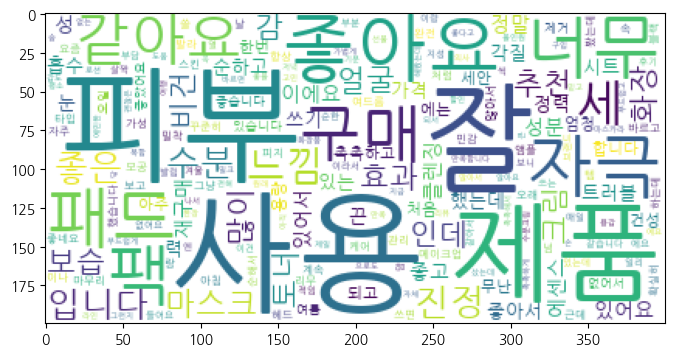

In [124]:
wordcloud =  WordCloud(background_color='white', font_path ="C:/Users/pc/Desktop/민지/동아리/프로젝트/NanumGothicCoding-2.5/NanumGothicCoding.ttf").generate_from_frequencies(dic_word)
wordcloud.words_ #비율 알려줌

#워드 클라우드 그리기

plt.figure(figsize=(8,12))
plt.imshow(wordcloud)

In [151]:
#한 제품에 대한 워드클라우드 생성
reiews_product1 = reivews_2[reivews_2["제품명"] ==reivews_2['제품명'].unique()[0]]
reiews_product1

,제품명,리뷰 내용,리뷰내용_new,토큰화
0,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,아이리무버는 이것만 써요\n눈에 자극 없이 순해서 좋아요!!,아이리무버는 이것만 써요 눈에 자극 없이 순해서 좋아요,"[리무, 써요, 눈, 자극, 순해서, 좋아요]"
1,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,피부 좀 예민한 편인데 트러블 없이 잘 지워져요\n세일할 때 무조건 쟁여 두는 것 ...,피부 좀 예민한 편인데 트러블 없이 잘 지워져요 세일할 때 무조건 쟁여 두는 것 중 하나,"[피부, 예민한, 인데, 트러블, 잘, 지워져요, 세, 무조건, 쟁, 두는]"
2,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,일케 깨끗-하게 지워지는 리무버 잘 없습니당 !! 재구매 의사 이따시,일케 깨끗 하게 지워지는 리무버 잘 없습니당 재구매 의사 이따시,"[일케, 깨끗, 지워지는, 리무, 잘, 니당, 재구매, 의사, 이따]"
3,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,이 제품은 지난번에도 사용했었는데 휴대용으로 먼저 사용해 보았을때 눈가에 너무 자극...,이 제품은 지난번에도 사용했었는데 휴대용으로 먼저 사용해 보았을때 눈가에 너무 자극...,"[제품, 지난번, 사용, 했었는데, 휴대, 먼저, 사용, 보았을, 눈가, 너무, 자..."
4,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,향은 딱히 안 나고 눈 닦을때 패드가 말라있으면 눈 닦을때 아파서 물을 묻히고 닦는...,향은 딱히 안 나고 눈 닦을때 패드가 말라있으면 눈 닦을때 아파서 물을 묻히고 닦는...,"[딱히, 나고, 눈, 닦을, 패드, 말라있으면, 눈, 닦을, 아파서, 묻히고, 닦는..."
...,...,...,...,...
194,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,좋아요 잘 지워지고요 다만 눈에 들어가면 너무 아파요 ㅜㅜㅜㅜ,좋아요 잘 지워지고요 다만 눈에 들어가면 너무 아파요,"[좋아요, 잘, 지워지고요, 눈, 들어가면, 너무, 아파요]"
195,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,확실히 눈 따가움 현상 없이 순하게 잘 지워지네요 용량도 커서 가성비 좋게 사용 할...,확실히 눈 따가움 현상 없이 순하게 잘 지워지네요 용량도 커서 가성비 좋게 사용 할...,"[확실히, 눈, 따가, 움, 현상, 순하게, 잘, 지워지네요, 용량, 커서, 가성,..."
196,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,눈가 주위를 클렌징할 때 자극이 조금 있는 편인 것 같아요.\n세정력은 좋습니다.,눈가 주위를 클렌징할 때 자극이 조금 있는 편인 것 같아요 세정력은 좋습니다,"[눈가, 주위, 클렌징할, 자극, 있는, 같아요, 세, 정력, 좋습니다]"
197,[비건인증] 아리얼 스트레스 릴리빙 미셀라 립앤아이 리무버 300ml,세정력 좋아요 용량도 많아서 한동안 꾸준히 쓸 수 있을 것 같아요,세정력 좋아요 용량도 많아서 한동안 꾸준히 쓸 수 있을 것 같아요,"[세, 정력, 좋아요, 용량, 많아서, 한동안, 꾸준히, 쓸, 있을, 같아요]"


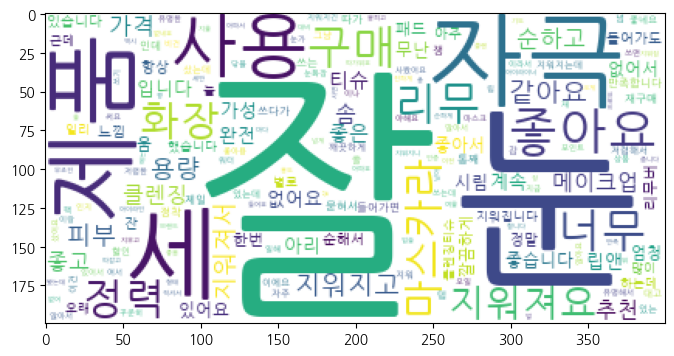

In [152]:
token_list = reiews_product1["토큰화"].tolist()

word_list2=[]
for i in token_list:
    for j in i:
        word_list2.append(j)

frequent2 = Counter(word_list2).most_common()

dic_word2 = {key: value for key, value in frequent2}
dic_word2

wordcloud2 =  WordCloud(background_color='white', font_path ="C:/Users/pc/Desktop/민지/동아리/프로젝트/NanumGothicCoding-2.5/NanumGothicCoding.ttf").generate_from_frequencies(dic_word2)

plt.figure(figsize=(8,12))
plt.imshow(wordcloud2)

In [ ]:
# #제품명 별로 wordcloud 생성

# grouped_data = data.groupby('제품명')

# for product_name, group in grouped_data:
#     reviews = " ".join(group['리뷰 내용'])
#     print(f"제품명: {product_name}")
#     displayWordCloud(reviews)

# #제품 별 워드클라우드 생성
# reiews_product1 = reivews_2[reivews_2["제품명"] ==reivews_2['제품명'].unique()[0]] #제품0
# reiews_product1

# token_list = reiews_product1["토큰화"].tolist()

# word_list2=[]
# for i in token_list:
#     for j in i:
#         word_list2.append(j)

# frequent2 = Counter(word_list2).most_common()

# dic_word2 = {key: value for key, value in frequent2}
# dic_word2

# wordcloud2 =  WordCloud(background_color='white', font_path ="C:/Users/pc/Desktop/민지/동아리/프로젝트/NanumGothicCoding-2.5/NanumGothicCoding.ttf").generate_from_frequencies(dic_word2)

# plt.figure(figsize=(8,12))
# plt.imshow(wordcloud2)


## 4. TF-IDF
- 단독 적용시 그냥 단순히 키워드의 개수를 세는 것 이상으로 아무것도 못함
- 다른 방법과 함께 적용하는 것이 좋을 듯 함 => TextRank 이용

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(word_list)

# 단어 목록
feature_names = vectorizer.get_feature_names_out()

# 대표 키워드 선정을 위한 가중치 합산
weighted_sum = tfidf_matrix.sum(axis=0)

# 각 단어의 인덱스와 가중치를 매핑
word_weights = [(word, weighted_sum[0, index]) for word, index in zip(feature_names, range(len(feature_names)))]

# 가중치를 기준으로 정렬
sorted_word_weights = sorted(word_weights, key=lambda x: x[1], reverse=True)

# 상위 N개의 대표 키워드 출력
top_keywords_count = 30  # 상위 N개의 키워드를 출력하려면 이 값을 조절하세요
top_keywords = sorted_word_weights[:top_keywords_count]

# 결과 출력
for i, (keyword, weight) in enumerate(top_keywords):
    print(f"{i + 1}. {keyword}: {weight:.4f}")

### TextRank를 사용하여 리뷰에서의 단어 중요도를 파악
- 전처리를 하지 않은 데이터로 사용
- 단어가 아닌 띄어쓰기로 구분되는 듯함 => 때문에 이상한 단어가 포함되기도 하나, 키워드 선별 후 전처리를 다시 하는것도 괜찮을 듯 함
- TF-IDF로 선별한 단어들과 비교해서 최종 단어 선택하는 것이 좋아보임

In [ ]:
!pip install summa

In [ ]:
# '리뷰 내용' 컬럼의 데이터를 \n으로 구분된 하나의 텍스트 문장으로 합치기
combined_reviews = '\n'.join(reivews_2['리뷰내용_new'])

# 출력
print(combined_reviews)

In [ ]:
from summa import keywords

# 텍스트 데이터
text = combined_reviews

# TextRank를 사용하여 키워드 추출
result = keywords.keywords(text, words=40)

# 결과 출력
print(result)

In [ ]:
import matplotlib.pyplot as plt
from summa import keywords
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 텍스트 데이터
text = combined_reviews

# TextRank를 사용하여 키워드 추출
result_textrank = keywords.keywords(text, words=30)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text])

# 단어 집합
feature_names = np.array(vectorizer.get_feature_names_out())

# 각 단어의 TF-IDF 값을 추출
tfidf_values = tfidf_matrix.toarray().flatten()

# 각 단어와 TF-IDF 값을 튜플로 묶고, TF-IDF 값이 큰 순서로 정렬
sorted_tfidf = sorted(zip(feature_names, tfidf_values), key=lambda x: x[1], reverse=True)

# TextRank와 TF-IDF 결과 출력
print("TextRank Keywords:")
print(result_textrank)

print("\nTF-IDF Keywords (TF-IDF >= 0.05):")
# TF-IDF 값이 0.05 이상인 경우만 출력
for keyword, tfidf_value in sorted_tfidf:
    if tfidf_value >= 0.05:
        print(f"{keyword}: {tfidf_value:.4f}")

# 두 개의 subplot 생성
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# 첫 번째 subplot 그리기 (전체 TF-IDF)
ax1.hist(tfidf_values, bins=50, alpha=0.5, color='b', edgecolor='black', label='All TF-IDF')
ax1.set_title('All TF-IDF Distribution')
ax1.set_ylabel('Frequency')

# TF-IDF 값이 0.05 이상인 단어들의 인덱스 추출
selected_indices = np.where(tfidf_values >= 0.05)[0]

# 선택된 단어와 TF-IDF 값을 튜플로 묶기
selected_tfidf = [(feature_names[i], tfidf_values[i]) for i in selected_indices]

# TF-IDF 값이 큰 순서로 정렬 (선택된 TF-IDF)
sorted_selected_tfidf = sorted(selected_tfidf, key=lambda x: x[1], reverse=True)

# 두 번째 subplot 그리기 (선택된 TF-IDF)
ax2.hist(tfidf_values[selected_indices], bins=30, alpha=0.5, color='r', edgecolor='black', label='Selected TF-IDF')
ax2.set_title('Selected TF-IDF Distribution')
ax2.set_xlabel('TF-IDF Values')
ax2.set_ylabel('Frequency')

# 범례 추가
ax1.legend()
ax2.legend()

# 히스토그램 보여주기
plt.tight_layout()
plt.show()